In [1]:
import numpy as np
import random
import sys
import scipy.optimize as opt
import matplotlib.pyplot as plt
from matplotlib import rcParams
import astropy.units as u
# general plotting options 
rcParams.update({'figure.autolayout': True})
my_cmap = plt.cm.jet
my_cmap.set_under('white',.01)
my_cmap.set_over('white', 300)
my_cmap.set_bad('white')


In [2]:
# generate the random offset but not reveal it to user until the end
sigma    = 70
x_offset = random.gauss(0, sigma)
y_offset = random.gauss(0, sigma)

In [3]:
def twoD_Gaussian(xy_tuple, amplitude, xo, yo):
    (x, y) = xy_tuple
    xo = float(xo)
    yo = float(yo)
    amplitude = float(amplitude)
    sigma_x = sigma
    sigma_y = sigma
    g = amplitude * np.exp( - ( (x-xo)**2/(2*sigma_x**2) + (y-yo)**2/(2*sigma_y**2) ) )#            ((x-xo)/sigma_x**2) - ((y-yo)/sigma_y**2))
    return g.ravel()

In [4]:
check_angles = {0: [-30., -150.], 1: [-30., 90], 2: [-150., 90.], 3: [-30., -150.]}
norm = 12.

def run_simulation():
    x = []
    y = []
    z = []
    pos = []
    # initial point
    x_offset = random.gauss(0, sigma)
    y_offset = random.gauss(0, sigma)
    x.append(x_offset)
    y.append(y_offset)
    z.append(twoD_Gaussian((x_offset, y_offset), norm, 0., 0.)[0])
    pos.append(0)
    # next third iterations
    # 1. 
    x_trial = x_offset + 50.*np.cos(30.*u.deg)
    y_trial = y_offset + 50.*np.sin(30.*u.deg)
    z_trial = twoD_Gaussian((x_trial, y_trial), norm, 0., 0.)[0]
    x.append(x_trial.value); y.append(y_trial.value); z.append(z_trial)
    pos.append(1)
    # 2.
    x_trial = x_offset - 50.*np.cos(30.*u.deg)
    y_trial = y_offset + 50.*np.sin(30.*u.deg)
    z_trial = twoD_Gaussian((x_trial, y_trial), norm, 0., 0.)[0]
    x.append(x_trial.value); y.append(y_trial.value); z.append(z_trial)
    pos.append(2)
    # 3.
    x_trial = x_offset 
    y_trial = y_offset - 50.
    z_trial = twoD_Gaussian((x_trial, y_trial), norm, 0., 0.)[0]
    x.append(x_trial); y.append(y_trial); z.append(z_trial)
    pos.append(3)

    max_idx = np.argmax(z)
    new_angles = check_angles[max_idx]
    for i in range(2):
        x_trial = x_offset - 50.*np.cos(new_angles[i]*u.deg)
        y_trial = y_offset + 50.*np.sin(new_angles[i]*u.deg)
        z_trial = twoD_Gaussian((x_trial, y_trial), norm, 0., 0.)[0]
        x.append(x_trial.value); y.append(y_trial.value); z.append(z_trial)

    """
    plt.hist2d(x, y, weights=z, cmap=my_cmap)
    plt.colorbar()
    plt.xlim(-100., 100.)
    plt.ylim(-100., 100.)
    plt.show()
    """
    initial_guess = (2., -5., -5.)
    try:
        popt, pcov = opt.curve_fit(twoD_Gaussian, (x, y), z, p0=initial_guess)
    except:
        print("NO CONVERGENCE")
    return popt

/Users/abbymkaplan/anaconda3/envs/desi/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/abbymkaplan/anaconda3/envs/desi/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


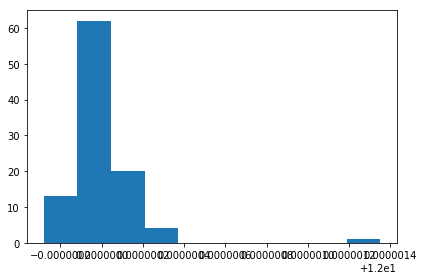

In [5]:
ns = []
for i in range(100):
    n, xo, yo = run_simulation()
    ns.append(n)
plt.hist(ns)
plt.show()